In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This dataset contains 9,568 data points collected over 6 years (2006-2011) from a Combined Cycle Power Plant (CCPP). The goal is to predict the net hourly electrical energy output (PE) of the plant using four ambient variables: Ambient Temperature (AT),Exhaust Vacuum (V), Ambient Pressure (AP),and Relative Humidity (RH).

In [3]:
data = pd.read_excel('Folds5x2_pp.xlsx')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
print("Feautures\n", X.head())
print("Shape of Features Dataframe:", X.shape)
print("Targets\n", y.head())
print("Shape of Targets:", y.shape)

Feautures
       AT      V       AP     RH
0  14.96  41.76  1024.07  73.17
1  25.18  62.96  1020.04  59.08
2   5.11  39.40  1012.16  92.14
3  20.86  57.32  1010.24  76.64
4  10.82  37.50  1009.23  96.62
Shape of Features Dataframe: (9568, 4)
Targets
 0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: PE, dtype: float64
Shape of Targets: (9568,)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train Feautures\n", X_train.head())
print("Shape of Train Features Dataframe:", X_train.shape)
print("Test Feautures\n", X_test.head())
print("Shape of Test Features Dataframe:", X_test.shape)
print("Train Targets\n", y_train.head())
print("Shape of Train Targets:", y.shape)
print("Test Targets\n", y_test.head())
print("Shape of Test Targets:", y_test.shape)

Train Feautures
          AT      V       AP     RH
5487  21.92  49.02  1009.29  88.56
3522  11.09  40.43  1025.47  74.97
6916   8.49  39.61  1021.05  87.74
7544  11.43  44.78  1013.43  82.45
7600  17.28  39.99  1007.09  74.25
Shape of Train Features Dataframe: (7654, 4)
Test Feautures
          AT      V       AP     RH
2513  19.64  48.06  1014.81  74.96
9411  28.26  69.23  1013.01  42.10
8745  27.98  67.17  1007.32  75.29
9085  28.64  69.23  1013.11  37.13
4950   9.34  38.08  1019.56  67.74
Shape of Test Features Dataframe: (1914, 4)
Train Targets
 5487    443.31
3522    490.96
6916    483.94
7544    471.09
7600    463.28
Name: PE, dtype: float64
Shape of Train Targets: (9568,)
Test Targets
 2513    455.27
9411    436.31
8745    440.68
9085    434.40
4950    482.06
Name: PE, dtype: float64
Shape of Test Targets: (1914,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f"Intercept: {model.intercept_:.3f}")
Co = [round(i, 3) for i in model.coef_]
print(f"Coefficients: {Co}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.8f} (MSE Without Manipulating)")
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2:.8f}")

Intercept: 454.431
Coefficients: [-14.764, -2.95, 0.37, -2.312]
Mean Squared Error: 20.27370600 (MSE Without Manipulating)
R^2 score: 0.93010464


In [7]:
residuals = y_test - y_pred
print("Residuals:\n", residuals.head())
print("Shape of Residuals:", residuals.shape)

Residuals:
 2513   -0.410208
9411   -2.422122
8745    6.515560
9085   -4.369546
4950    2.171671
Name: PE, dtype: float64
Shape of Residuals: (1914,)


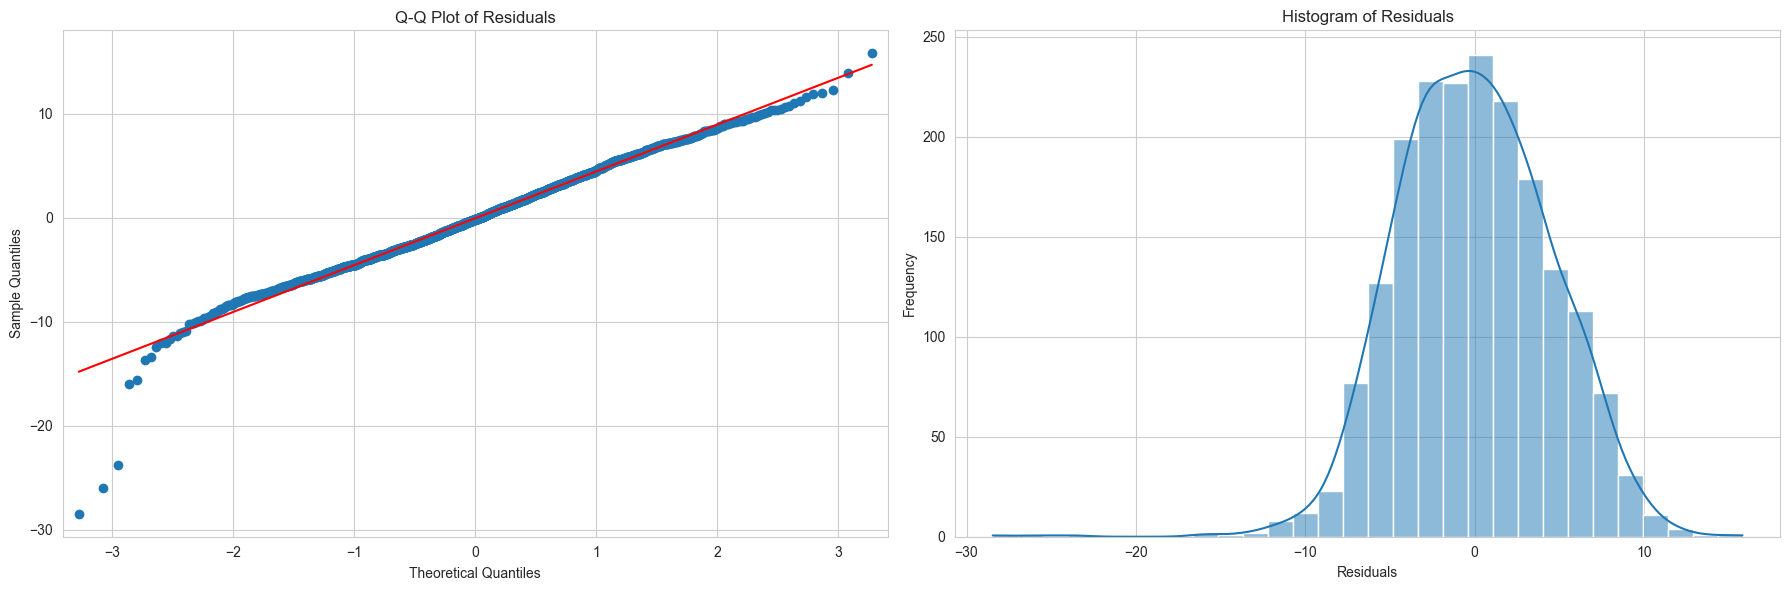

In [8]:
import statsmodels.api as sm

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title("Q-Q Plot of Residuals")

plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True, ax=plt.gca())
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
from scipy import stats

mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)
ks_statistic, p_value = stats.kstest(residuals, 'norm', args=(mean_residuals, std_residuals))
print(f'KS Statistic: {ks_statistic:.5f}')
print(f'p-value: {p_value:.5f}')

KS Statistic: 0.02033
p-value: 0.40196


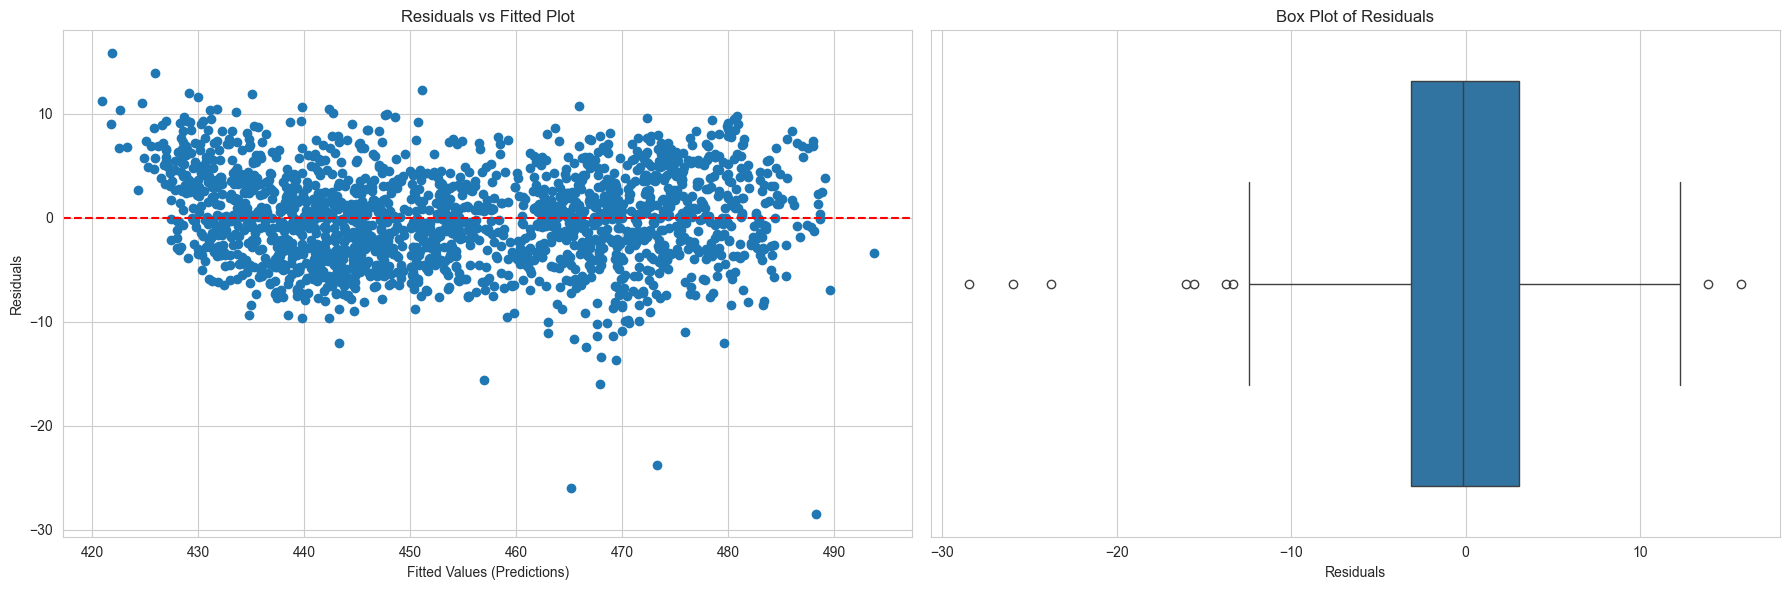

In [10]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values (Predictions)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Plot')

plt.subplot(1, 2, 2)
sns.boxplot(x=residuals)
plt.title('Box Plot of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

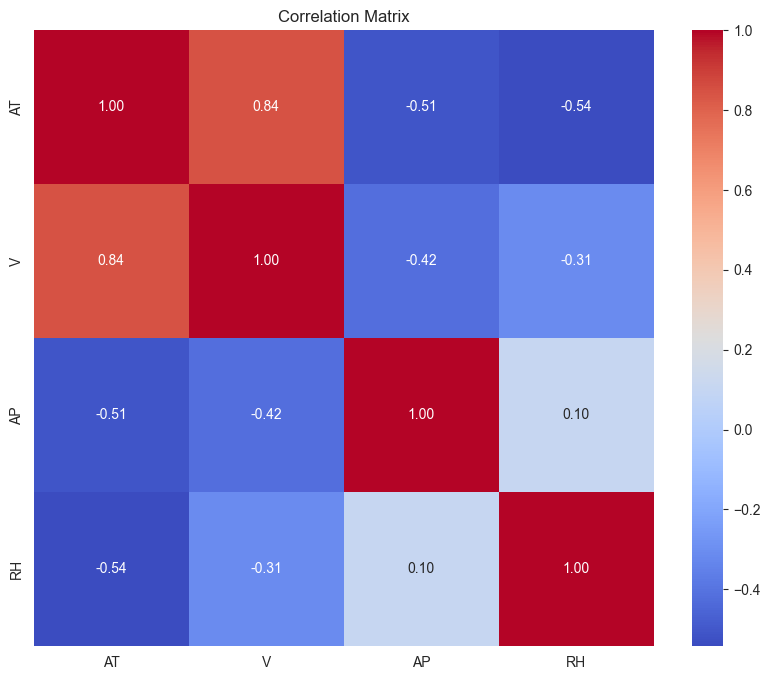

In [11]:
correlation_matrix = X_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Feature           VIF
0   const  43502.444916
1      AT      5.959903
2       V      3.942998
3      AP      1.447294
4      RH      1.707049


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)
print("Shape of Train Featuers and Test Features Dataframe after PCA:", "\nTrain:", X_train_PCA.shape,"\nTest:", X_test_PCA.shape)
explained_variance = pca.explained_variance_ratio_
print("explained variance ratio", explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print("cumulative variance ratio", cumulative_variance)

Shape of Train Featuers and Test Features Dataframe after PCA: 
Train: (7654, 3) 
Test: (1914, 3)
explained variance ratio [0.60997436 0.22680929 0.13751512]
cumulative variance ratio [0.60997436 0.83678365 0.97429877]


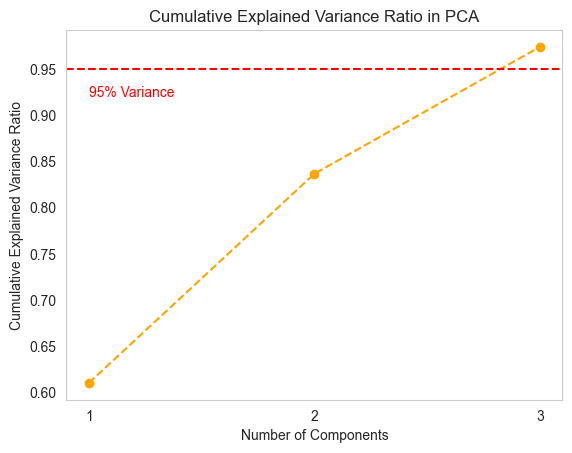

In [23]:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='orange')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.text(1, 0.92, '95% Variance', color='red')
plt.title('Cumulative Explained Variance Ratio in PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()

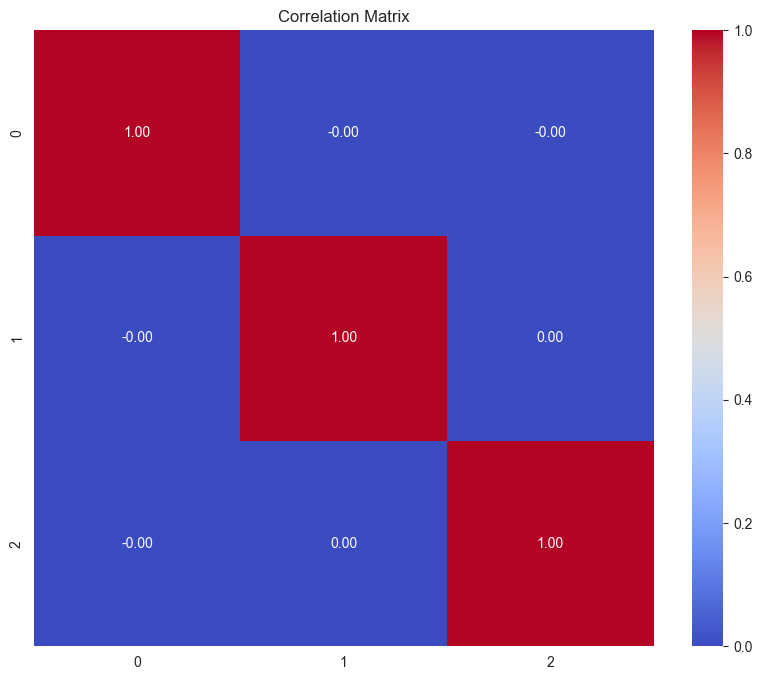

In [30]:
PCA_Xdf = pd.DataFrame(X_train_PCA)
PCA_correlation_matrix = PCA_Xdf.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(PCA_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

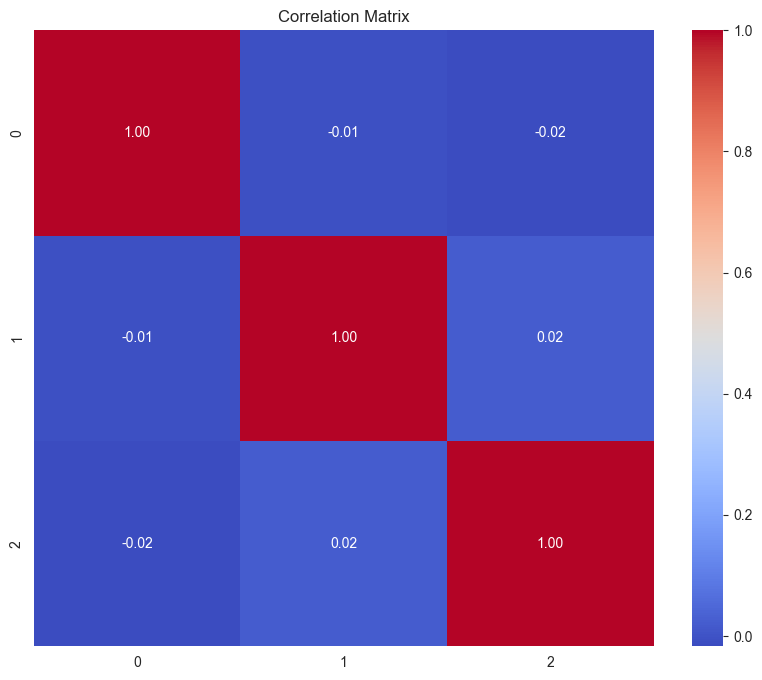

In [31]:
PCA_Xdf = pd.DataFrame(X_test_PCA)
PCA_correlation_matrix = PCA_Xdf.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(PCA_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [80]:
PCA_model = LinearRegression()
PCA_model.fit(X_train_PCA, y_train)
PCA_y_pred = PCA_model.predict(X_test_PCA)
PCA_residuals = y_test - PCA_y_pred
print(f"Intercept: {PCA_model.intercept_:.3f}")
Co = [round(i, 3) for i in PCA_model.coef_]
print(f"Coefficients: {Co}")
mse = mean_squared_error(y_test, PCA_y_pred)
print(f"Mean Squared Error: {mse:.8f} (MSE After PCA)")
PCA_R2 = r2_score(y_test, PCA_y_pred)
print(f"R^2 score: {PCA_R2:.8f}")

Intercept: 454.431
Coefficients: [-9.99, -1.531, 5.097]
Mean Squared Error: 30.33164515 (MSE After PCA)
R^2 score: 0.89542903


In [61]:
PCA_coef = PCA_model.coef_
print("(PCA) Coefficients:\n", PCA_coef)
PCA_components = pca.components_
print("PCA Components:\n", PCA_components)
scaled_coefficients = np.dot(PCA_components.T, PCA_coef)
print("Coefficients for Scaled Features:\n", scaled_coefficients)
sigma = scaler.scale_
unscaled_coefficients = scaled_coefficients / sigma
print("Coefficients for Unscaled Features:\n", unscaled_coefficients)

(PCA) Coefficients:
 [-9.99049421 -1.53117512  5.09651488]
PCA Components:
 [[ 0.61439012  0.55946942 -0.40558288 -0.38081658]
 [-0.05185881  0.1051349  -0.64364381  0.75629357]
 [-0.16941701 -0.59206114 -0.63349575 -0.46844917]]
Coefficients for Scaled Features:
 [-6.92209235 -8.76780437  1.80888434  0.25906982]
Coefficients for Unscaled Features:
 [-0.93109243 -0.68989997  0.30426834  0.0177163 ]


In [48]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
alpha_range = np.logspace(-4, 4, 50)
print("Alpha Range:\n", alpha_range)

[1.00000000e-04 1.45634848e-04 2.12095089e-04 3.08884360e-04
 4.49843267e-04 6.55128557e-04 9.54095476e-04 1.38949549e-03
 2.02358965e-03 2.94705170e-03 4.29193426e-03 6.25055193e-03
 9.10298178e-03 1.32571137e-02 1.93069773e-02 2.81176870e-02
 4.09491506e-02 5.96362332e-02 8.68511374e-02 1.26485522e-01
 1.84206997e-01 2.68269580e-01 3.90693994e-01 5.68986603e-01
 8.28642773e-01 1.20679264e+00 1.75751062e+00 2.55954792e+00
 3.72759372e+00 5.42867544e+00 7.90604321e+00 1.15139540e+01
 1.67683294e+01 2.44205309e+01 3.55648031e+01 5.17947468e+01
 7.54312006e+01 1.09854114e+02 1.59985872e+02 2.32995181e+02
 3.39322177e+02 4.94171336e+02 7.19685673e+02 1.04811313e+03
 1.52641797e+03 2.22299648e+03 3.23745754e+03 4.71486636e+03
 6.86648845e+03 1.00000000e+04]


In [64]:
ridge = Ridge()
ridge_params = {'alpha': alpha_range}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=10)
ridge_cv.fit(X_train, y_train)
best_alpha_ridge = ridge_cv.best_params_['alpha']
print(f"Best alpha for Ridge: {best_alpha_ridge:.5f}")

Best alpha for Ridge: 35.56480


In [78]:
final_ridge_model = Ridge(alpha=best_alpha_ridge)
final_ridge_model.fit(X_train, y_train)
y_pred_ridge = final_ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error: {mse:.8f} (MSE after Ridge Regularization)")
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² score for Ridge: {r2_ridge:.8f}")

Mean Squared Error: 20.27295055 (MSE after Ridge Regularization)
R² score for Ridge: 0.93010725


In [71]:
lasso = Lasso()
lasso_params = {'alpha': alpha_range}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=10)
lasso_cv.fit(X_train, y_train)
best_alpha_lasso = lasso_cv.best_params_['alpha']
print(f"Best alpha for Lasso: {best_alpha_lasso:.8f}")

Best alpha for Lasso: 0.00294705


In [81]:
lasso_final = Lasso(alpha=best_alpha_lasso)
lasso_final.fit(X_train, y_train)
y_pred_lasso = lasso_final.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lasso)
print(f"Mean Squared Error: {mse:.8f} (MSE after Lasso Regularization)")
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R² score for Lasso: {r2_lasso:.8f}")

Mean Squared Error: 20.27393151 (MSE after Lasso Regularization)
R² score for Lasso: 0.93010387


20.27370600 -> (MSE Without Manipulating)
30.33164515 -> (MSE After PCA)
20.27295055 -> (MSE after Ridge Regularization)
20.27393151 -> (MSE after Lasso Regularization)